# **Machine Learning - MLP** # 



# Preparation


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Dataset

In [ ]:
import cv2
import os 
import numpy as np

# extract zip file
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/ML Coursework/COP508_Sea_Animal_dataset.zip', 'r') as zipObj:
  zipObj.extractall('/content/')

sea_animals = '/content/COP508_Sea_Animal_dataset'

class_names = ['Corals', 'Crabs', 'Dolphin', 'Eel', 'Jelly Fish', 'Lobster', 'Nudibranchs',
              'Octopus', 'Puffers', 'Sea Rays', 'Seahorse', 'Seal', 'Sharks', 'Squid', 'Starfish',
               'Whale']
X = []
y = []

# iterarate through dataset
for names_index, names in enumerate(class_names):
  for images in os.listdir(os.path.join(sea_animals, names)):
    image_path = os.path.join(sea_animals, names, images)
    # read images and save into list
    img = cv2.imread(image_path)
    # resize images so all equal
    img = cv2.resize(img, (80, 80))
    X.append(img) 
    y.append(names_index)

# X contains images
X = np.asarray(X)
# y contains labels
y = np.asarray(y)


Exploring Dataset

This training set contains 16 classes, as listed below

In [ ]:
os.listdir(sea_animals)

['Seahorse',
 'Starfish',
 'Jelly Fish',
 'Seal',
 'Lobster',
 'Sea Rays',
 'Puffers',
 'Squid',
 'Whale',
 'Corals',
 'Nudibranchs',
 'Sharks',
 'Crabs',
 'Octopus',
 'Eel',
 'Dolphin']

These are the names of all images within the, 'Eel,' class

In [ ]:
os.listdir(os.path.join(sea_animals, 'Eel'))

['32102807772_c5a92a0d5b_b.jpg',
 '15815461754_e0478e56be_o.jpg',
 '233118790_49a34c3ce0_o.jpg',
 '14118782981_6330f43049_b.jpg',
 '3605359334_d3e8b3943d_b.jpg',
 '4155234224_2c5530c11e_o.jpg',
 '3832169097_dd24bb1e14_o.jpg',
 '7776217078_7eaefc1a0c_b.jpg',
 '8155197556_ed7840a037_o.jpg',
 '7946873882_3348b90680_o.jpg',
 '5169235140_5f112dcdff_o.jpg',
 '2798479217_7a0cabfd94_b.jpg',
 '11560314403_c623953e68_o.jpg',
 '43266545031_68db35808e_b.jpg',
 '9971081013_a7e1f041da_o.jpg',
 '4244783227_715250a24d_o.jpg',
 '6245807589_7d863d80dd_o.jpg',
 '5322296456_8b2b566fc1_o.jpg',
 '13170307045_a6c776c632_o.jpg',
 '1354021192_c759d528ef_o.jpg',
 '33122782253_c7f70954cb_b.jpg',
 '15095858658_4344a7fe11_b.jpg',
 '33629151704_a0c90aa4a7_b.jpg',
 '266694447_b7b1ecdffb_o.jpg',
 '14463974261_c74ede430c_o.jpg',
 '8173854608_f36d5fdec3_o.jpg',
 '21458573411_35dc264bcf_b.jpg',
 '2431678639_60c20b7de7_o.jpg',
 '5602738024_813b2dde37_b.jpg',
 '29625028414_19b08ae1f9_b.jpg',
 '26633590373_97c8db26ab_o.jpg

Classes, with amount of images within each class

In [ ]:
sea_animals_data = {}
sea_animals_classes = sorted(os.listdir(sea_animals))
for name in sea_animals_classes:
    sea_animals_data[name] = len(os.listdir(sea_animals + f'/{name}'))
print(sea_animals_data)

{'Corals': 500, 'Crabs': 499, 'Dolphin': 782, 'Eel': 497, 'Jelly Fish': 855, 'Lobster': 499, 'Nudibranchs': 500, 'Octopus': 562, 'Puffers': 531, 'Sea Rays': 517, 'Seahorse': 478, 'Seal': 414, 'Sharks': 590, 'Squid': 483, 'Starfish': 499, 'Whale': 572}


X contains 8778 images, with image size of 80x80 pixels, and 3 channels

y contains 8778 labels relevant to the images

In [ ]:
print(X.shape)
print(y.shape)

(8778, 80, 80, 3)
(8778,)


Dataset is divided into a 70/20 training, testing split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)

X_train contains 7022 images, with image size of 80x80 pixels, and 3 channels

X_test contains 1756 images, with image size of 80x80 pixels, and 3 channels

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7022, 80, 80, 3)
(1756, 80, 80, 3)


In [ ]:
print('X_train:', X_train)
print('X_test', X_test)

X_train: [[[[171 113   1]
   [169 118   4]
   [171 106   0]
   ...
   [205 176 101]
   [206 177 101]
   [207 177 100]]

  [[160 118  22]
   [177 120   5]
   [167 118   7]
   ...
   [204 178 106]
   [199 174 101]
   [205 179 105]]

  [[238 209 152]
   [152 102   0]
   [200 161  82]
   ...
   [205 174  93]
   [201 170  89]
   [207 175  96]]

  ...

  [[173 116   0]
   [173 117   0]
   [174 117   1]
   ...
   [154 105   6]
   [163 110   3]
   [174 117   3]]

  [[175 119   0]
   [176 120   1]
   [176 120   1]
   ...
   [173 115   6]
   [177 119   4]
   [181 121   1]]

  [[176 121   0]
   [177 122   1]
   [177 122   1]
   ...
   [182 119   1]
   [183 122   2]
   [182 121   0]]]


 [[[165 144 122]
   [168 147 125]
   [156 135 113]
   ...
   [140 113  86]
   [138 111  84]
   [136 109  82]]

  [[134 113  91]
   [114  93  71]
   [118  97  75]
   ...
   [138 111  84]
   [140 113  86]
   [135 108  81]]

  [[143 122 100]
   [129 108  86]
   [134 113  91]
   ...
   [137 110  83]
   [135 108  81]
  

Labels 

In [ ]:
print('Labels in y:', np.bincount(y))
print('Labels in y_train:', np.bincount(y_train))
print('Labels in y_test:', np.bincount(y_test))
print('y_train:', y_train)
print('y_test', y_test)

Labels in y: [500 499 782 497 855 499 500 562 531 517 478 414 590 483 499 572]
Labels in y_train: [400 399 625 398 684 399 400 450 425 414 382 331 472 386 399 458]
Labels in y_test: [100 100 157  99 171 100 100 112 106 103  96  83 118  97 100 114]
y_train: [ 2 15  9 ...  5  5  3]
y_test [14  4 11 ...  1  3 12]


Plotting an image from dataset

(-0.5, 79.5, 79.5, -0.5)

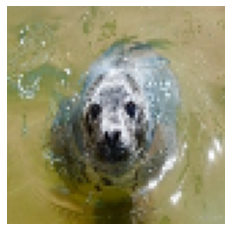

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train.reshape(7022, 80, 80, 3)[5])
plt.axis('off')

Third image in the training set is a Starfish

In [ ]:
class_names[y_test[3]]

'Starfish'

Plotting the first 20 images from the training set

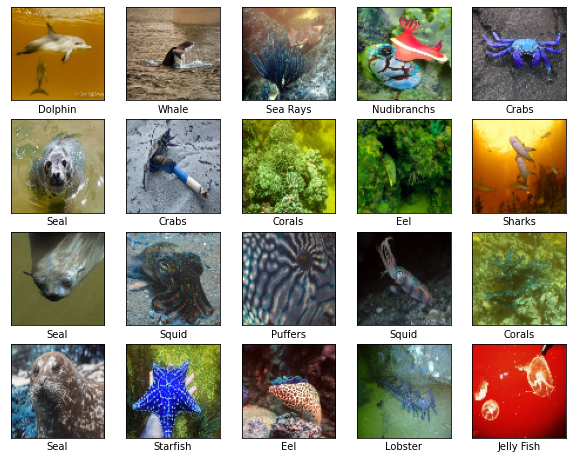

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(20):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train.reshape(7022, 80, 80, 3)[i], cmap='binary')
  plt.xlabel(class_names[y_train[i]])
plt.show()

X_train before standardisation

In [ ]:
X_train

array([[[[171, 113,   1],
         [169, 118,   4],
         [171, 106,   0],
         ...,
         [205, 176, 101],
         [206, 177, 101],
         [207, 177, 100]],

        [[160, 118,  22],
         [177, 120,   5],
         [167, 118,   7],
         ...,
         [204, 178, 106],
         [199, 174, 101],
         [205, 179, 105]],

        [[238, 209, 152],
         [152, 102,   0],
         [200, 161,  82],
         ...,
         [205, 174,  93],
         [201, 170,  89],
         [207, 175,  96]],

        ...,

        [[173, 116,   0],
         [173, 117,   0],
         [174, 117,   1],
         ...,
         [154, 105,   6],
         [163, 110,   3],
         [174, 117,   3]],

        [[175, 119,   0],
         [176, 120,   1],
         [176, 120,   1],
         ...,
         [173, 115,   6],
         [177, 119,   4],
         [181, 121,   1]],

        [[176, 121,   0],
         [177, 122,   1],
         [177, 122,   1],
         ...,
         [182, 119,   1],
        

Standardisation

In [ ]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
#X_val = (X_val - X_mean) / X_std

X_train after standardisation

In [ ]:
X_train

array([[[[ 8.84793425e-01,  3.31359155e-01, -9.17064972e-01],
         [ 8.28209651e-01,  3.86364992e-01, -8.76457354e-01],
         [ 8.38964728e-01,  1.85244818e-01, -9.38171264e-01],
         ...,
         [ 1.29979034e+00,  1.27138395e+00,  6.49207284e-01],
         [ 1.33081031e+00,  1.30399308e+00,  6.56881434e-01],
         [ 1.36441521e+00,  1.32050500e+00,  6.46430969e-01]],

        [[ 7.26667154e-01,  4.03409890e-01, -5.89304628e-01],
         [ 9.36029225e-01,  4.11372755e-01, -8.64701188e-01],
         [ 7.79782596e-01,  3.61364454e-01, -8.34737144e-01],
         ...,
         [ 1.28949900e+00,  1.30559472e+00,  7.27896045e-01],
         [ 1.23174458e+00,  1.25074498e+00,  6.51572036e-01],
         [ 1.33120612e+00,  1.34619341e+00,  7.20694648e-01]],

        [[ 1.79229667e+00,  1.80585344e+00,  1.45900384e+00],
         [ 5.91983361e-01,  1.30356176e-01, -9.44647111e-01],
         [ 1.23086089e+00,  1.02319411e+00,  3.28884958e-01],
         ...,
         [ 1.30113012e+0

Plotting images after standardisation

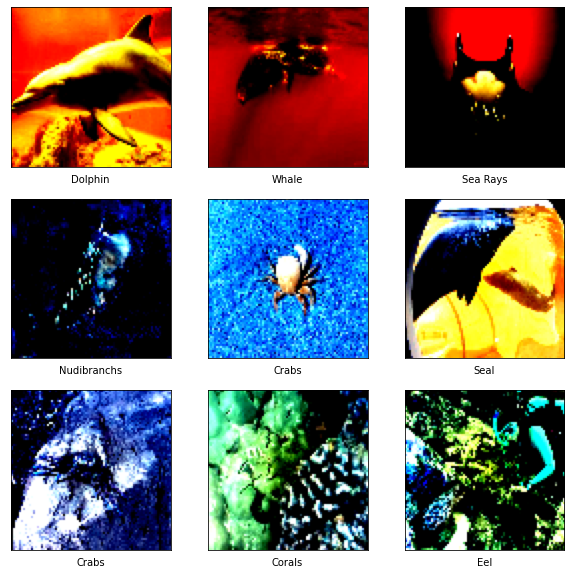

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train.reshape(7022, 80, 80, 3)[i], cmap='binary')
  plt.xlabel(class_names[y_train[i]])
plt.show()

X_train and X_test are of 3 dimensions

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7022, 80, 80, 3)
(1756, 80, 80, 3)


X_train and X_test are flattened into 2 dimensions to fit traditional ML models

In [ ]:
X_train = X_train.reshape(7022, 80*80*3)
X_test = X_test.reshape(1756, 80*80*3)

X_train and X_test after flattening

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7022, 19200)
(1756, 19200)


# MLP

Further splitting into additional validation set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, shuffle=True)

Plotting images after standardisation

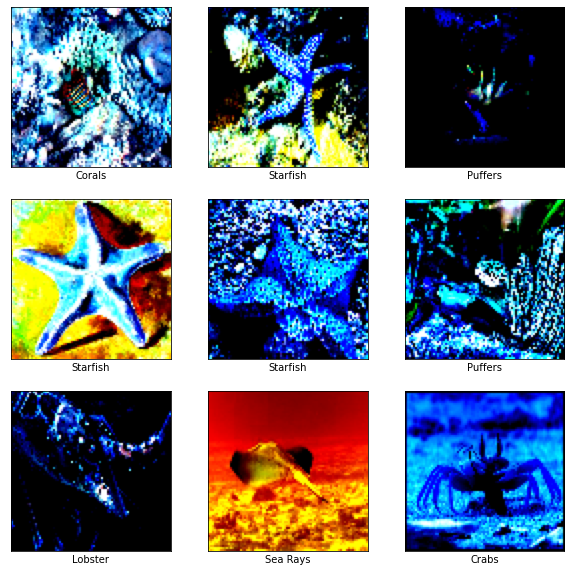

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train.reshape(5266, 80, 80, 3)[i], cmap='binary')
  plt.xlabel(class_names[y_train[i]])
plt.show()

Labels

In [ ]:
print('Labels in y:', np.bincount(y))
print('Labels in y_train:', np.bincount(y_train))
print('Labels in y_test:', np.bincount(y_test))
print('Labels in y_val:', np.bincount(y_val))
print('y_train:', y_train)
print('y_test', y_test)
print('y_val', y_val)

Labels in y: [500 499 782 497 855 499 500 562 531 517 478 414 590 483 499 572]
Labels in y_train: [294 294 460 302 509 298 297 333 307 326 292 244 378 289 304 339]
Labels in y_test: [100 100 157  99 171 100 100 112 106 103  96  83 118  97 100 114]
Labels in y_val: [106 105 165  96 175 101 103 117 118  88  90  87  94  97  95 119]
y_train: [ 0 14  8 ...  4 12 13]
y_test [14  4 11 ...  1  3 12]
y_val [ 8  4 12 ...  2  9  1]


Reshaping from flattened to fit MLP model

In [ ]:
X_train = X_train.reshape(5266, 80, 80, 3)
X_test = X_test.reshape(1756, 80, 80, 3)
X_val = X_val.reshape(1756, 80, 80, 3)

MLP sparse categorical crossentropy architecture

In [ ]:
import tensorflow as tf
import keras

model_mlp = keras.Sequential([
    keras.layers.Flatten(input_shape=(80, 80, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='softmax')
])

In [ ]:
model_mlp.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_mlp = model_mlp.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 2s 6ms/step - loss: 13.1740 - accuracy: 0.1872 - val_loss: 13.1824 - val_accuracy: 0.1560
Epoch 2/10
165/165 [==============================] - 1s 5ms/step - loss: 9.5604 - accuracy: 0.2554 - val_loss: 12.0405 - val_accuracy: 0.1640
Epoch 3/10
165/165 [==============================] - 1s 5ms/step - loss: 7.5604 - accuracy: 0.3097 - val_loss: 11.0182 - val_accuracy: 0.2255
Epoch 4/10
165/165 [==============================] - 1s 4ms/step - loss: 6.1910 - accuracy: 0.3631 - val_loss: 9.2258 - val_accuracy: 0.1862
Epoch 5/10
165/165 [==============================] - 1s 4ms/step - loss: 5.1974 - accuracy: 0.4102 - val_loss: 9.8372 - val_accuracy: 0.1948
Epoch 6/10
165/165 [==============================] - 1s 5ms/step - loss: 4.2548 - accuracy: 0.4550 - val_loss: 9.6600 - val_accuracy: 0.2221
Epoch 7/10
165/165 [==============================] - 1s 4ms/step - loss: 3.6850 - accuracy: 0.4928 - val_loss: 7.4729 - val_accuracy: 0.2386
Ep

MLP plotted results

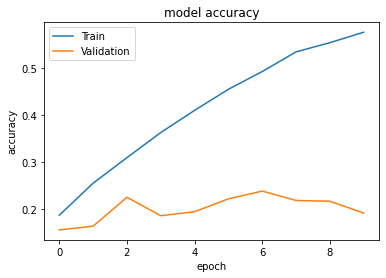

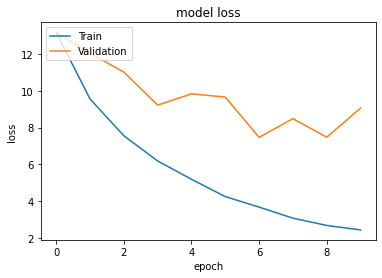

In [ ]:
import matplotlib.pyplot as plt
# accuracy
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# loss
plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

MLP categorical crossentropy architecture

One Hot Encoding

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
model_mlp_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(80, 80, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='softmax')
])

In [ ]:
model_mlp_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_mlp_2 = model_mlp_2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
165/165 [==============================] - 2s 7ms/step - loss: 12.9185 - accuracy: 0.1907 - val_loss: 19.1980 - val_accuracy: 0.1333
Epoch 2/10
165/165 [==============================] - 1s 6ms/step - loss: 10.1564 - accuracy: 0.2552 - val_loss: 10.2731 - val_accuracy: 0.2113
Epoch 3/10
165/165 [==============================] - 1s 5ms/step - loss: 7.7826 - accuracy: 0.3082 - val_loss: 9.8852 - val_accuracy: 0.2147
Epoch 4/10
165/165 [==============================] - 1s 5ms/step - loss: 6.4334 - accuracy: 0.3557 - val_loss: 9.1925 - val_accuracy: 0.1822
Epoch 5/10
165/165 [==============================] - 1s 5ms/step - loss: 5.1573 - accuracy: 0.4039 - val_loss: 10.3652 - val_accuracy: 0.2380
Epoch 6/10
165/165 [==============================] - 1s 6ms/step - loss: 4.3606 - accuracy: 0.4408 - val_loss: 9.1993 - val_accuracy: 0.2062
Epoch 7/10
165/165 [==============================] - 1s 6ms/step - loss: 3.7851 - accuracy: 0.4839 - val_loss: 8.0147 - val_accuracy: 0.2101
E

MLP plotted results

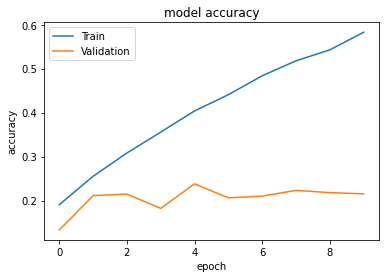

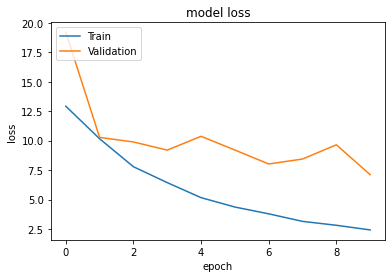

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_mlp_2.history['accuracy'])
plt.plot(history_mlp_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_mlp_2.history['loss'])
plt.plot(history_mlp_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()